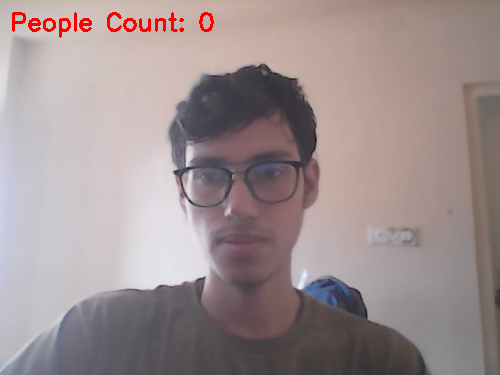

In [1]:
import cv2
import imutils
from IPython.display import display, clear_output
from PIL import Image

# Load the pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the webcam for video capture
cap = cv2.VideoCapture(0)

# Initialize a counter to keep track of the number of people detected
count = 0

# Loop through each frame in the video
frame_limit = 100  # Set a limit to automatically stop after 100 frames (you can change this)
frame_count = 0

while frame_count < frame_limit:
    # Read the current frame
    ret, frame = cap.read()
    
    # Break the loop if there are no more frames
    if not ret:
        break

    # Resize the frame for better performance
    frame = imutils.resize(frame, width=500)
    
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Update the people count based on the number of detected faces
    count = len(faces)

    # Display the people count on the frame
    cv2.putText(frame, "People Count: {}".format(count), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Convert the frame to an image format that can be displayed in Jupyter
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)
    
    # Clear the output and display the image
    clear_output(wait=True)
    display(img)

    # Save the frame with detected faces (optional)
    cv2.imwrite(f"output_frame_{frame_count}.png", frame)

    # Increment the frame count
    frame_count += 1

# Release the video capture (this turns off the webcam)
cap.release()
